# 1. 라이브러리 세팅

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [59]:
# pandas options
pd.set_option('display.max_columns', 30)

In [49]:
# 파일 불러오기
brt_line = gpd.read_file('01outputdata/brt_line.geojson')
brt_line = brt_line[['geometry']]
brt_line.to_crs(epsg=4326, inplace=True)

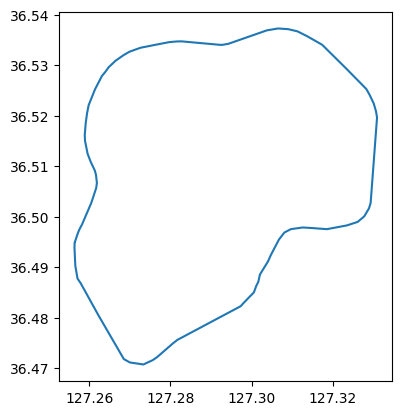

In [50]:
# 해당 원형 포인트들을 라인으로 잇기
brt_line.plot()
plt.show()

# 2. 상가데이터 불러오기

In [55]:
# 상가데이터 불러오기

vacancy_2405 = gpd.read_file('00data/101.상가_공실률.csv')
vacancy_2405.to_crs(epsg=4326, inplace=True)
vacancy_2405.head()

AttributeError: 'DataFrame' object has no attribute 'to_crs'

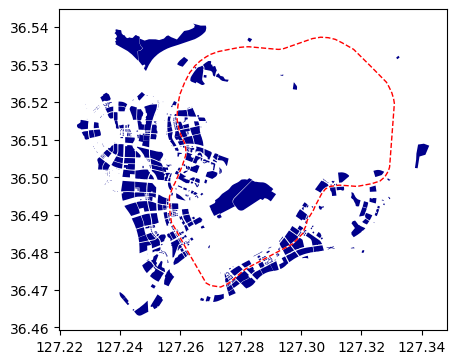

In [52]:
# brt 라인과 함께 플롯
fig, ax = plt.subplots(figsize=(5, 5))
brt_line.plot(ax=ax, color='red', linewidth=1, linestyle='--')  
vacancy_2405.plot(ax=ax, color='Darkblue')
plt.show()

# 3. 거리 연산

In [54]:
# 각 필지별로 거리를 연산하여 피처에 추가
vacancy_2405['distance'] = vacancy_2405.distance(brt_line.unary_union)
vacancy_2405.head()

C:\Users\Jaesik\AppData\Local\Temp\ipykernel_11524\270950459.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  vacancy_2405['distance'] = vacancy_2405.distance(brt_line.union_all())


,Tot_Rooms,Tot_frnchs,sanga_area,frnch_ratio,arch_area,tot_area,use_apr_day,vacancy_rat,AREA,distance
count,624.000000,624.000000,624.000000,591.000000,388.000000,388.000000,388,388.000000,624.000000,624.000000
mean,15.274038,0.262821,1309.152035,0.027712,1053.279246,8024.969997,2016-12-27 05:19:10.515000,23.113941,16738.532051,0.008090
min,0.000000,0.000000,0.000000,0.000000,0.000000,98.280000,2011-11-07 00:00:00,0.000000,61.000000,0.000000
25%,2.000000,0.000000,134.760000,0.000000,206.067500,493.270000,2015-05-20 00:00:00,5.031421,640.250000,0.000988
50%,7.000000,0.000000,502.240000,0.000000,714.630000,3389.796850,2016-11-11 00:00:00,23.081830,1394.000000,0.005692
75%,19.250000,0.000000,1315.947500,0.000000,1231.417500,11343.420550,2018-03-31 00:00:00,32.383744,16970.000000,0.012537
max,740.000000,4.000000,104067.820000,1.000000,15578.480000,134569.270000,2024-01-30 00:00:00,90.000000,819850.000000,0.030447
std,34.425161,0.639645,4950.584553,0.108207,1527.488434,12931.470343,NaN,19.763147,51899.888084,0.008385


# 4. 공시지가

In [85]:
land_price = gpd.read_file('00data/공시지가2024/AL_D150_36_20240802.shp', encoding='euc-kr')
land_price.head(2)
land_price.set_crs(epsg=5186, inplace=True)
land_price.to_crs(epsg=4326, inplace=True)

In [86]:
# A7: 기준연도 A8: 기준월, A9: 공시지가
# A16: 2023-01 A17: 2022-01, A18: 2021-01,  A19: 2020-01
# 컬럼명 변경
land_price.drop(['A0', 'A1', 'A3', 'A15'], inplace=True, axis=1)
land_price.rename(columns={'A9': 2024, 'A16':2023, 'A17':2022, 'A18':2021,
                           'A19': 2020}, inplace=True)
land_price

,A2,A4,A5,A6,A7,A8,2024,A10,A11,A12,A13,A14,2023,2022,2021,2020,geometry
0,세종특별자치시 장군면 봉안리,일반,189-10,189-10임,2024,01,102100.0,0,None,None,NaN,2024-08-02,102600.0,105300.0,92600.0,87600.0,"POLYGON ((127.22804 36.49787, 127.22784 36.497..."
1,세종특별자치시 합강동,산,42-3,산42-3 임,None,None,NaN,None,None,None,NaN,2024-08-02,NaN,NaN,NaN,NaN,"POLYGON ((127.33541 36.51923, 127.33439 36.519..."
2,세종특별자치시 아름동,일반,1315,1315 대,2024,01,3809000.0,0,None,None,NaN,2024-08-02,4077000.0,4345000.0,4045000.0,3750000.0,"POLYGON ((127.24238 36.51211, 127.24207 36.512..."
3,세종특별자치시 부강면 부강리,일반,671-7,671-7 장,2024,01,234000.0,0,None,None,NaN,2024-08-02,0.0,0.0,0.0,0.0,"POLYGON ((127.37809 36.51985, 127.37811 36.519..."
4,세종특별자치시 도담동,일반,523,523 대,2024,01,1084000.0,0,None,None,NaN,2024-08-02,1071000.0,1140000.0,1040000.0,782000.0,"POLYGON ((127.26199 36.5194, 127.26204 36.5192..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206553,세종특별자치시 전의면 달전리,일반,593-9,593-9 전,2024,01,19700.0,0,None,None,NaN,2024-08-02,19300.0,20200.0,23200.0,14100.0,"POLYGON ((127.17581 36.63675, 127.17582 36.636..."
206554,세종특별자치시 전의면 달전리,일반,593-7,593-7 임,2024,01,19700.0,0,None,None,NaN,2024-08-02,19300.0,20200.0,23200.0,14100.0,"POLYGON ((127.17584 36.63655, 127.17584 36.636..."
206555,세종특별자치시 전동면 미곡리,일반,119,119 답,2024,01,46800.0,0,None,None,NaN,2024-08-02,46900.0,51100.0,47600.0,43500.0,"POLYGON ((127.22451 36.67034, 127.22451 36.670..."
206556,세종특별자치시 금남면 영곡리,일반,135,135 대,2024,01,209900.0,0,None,None,NaN,2024-08-02,203700.0,213700.0,187200.0,176300.0,"POLYGON ((127.26408 36.44389, 127.26403 36.443..."


In [87]:
# 대상지 바운더리로 필터링
sejong_boundary = gpd.read_file('00data/17.세종시_대상구역_바깥경계.geojson')
sejong_boundary.to_crs(epsg=4326, inplace=True)
land_price = gpd.sjoin(land_price, sejong_boundary, predicate='within')
land_price.shape

(28200, 18)

In [89]:
# 2020~2024년도와 geometry만 남기기
land_price = land_price[['geometry', 2020, 2021, 2022, 2023, 2024]]
land_price.head(2)

,geometry,2020,2021,2022,2023,2024
1,"POLYGON ((127.33541 36.51923, 127.33439 36.519...",NaN,NaN,NaN,NaN,NaN
2,"POLYGON ((127.24238 36.51211, 127.24207 36.512...",3750000.0,4045000.0,4345000.0,4077000.0,3809000.0


In [91]:
# 중심좌표로 전환
land_price['center'] = land_price.centroid
land_price = land_price.set_geometry('center')
land_price.drop('geometry', axis=1, inplace=True)
land_price.head(2)

C:\Users\Jaesik\AppData\Local\Temp\ipykernel_11524\1841602729.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  land_price['center'] = land_price.centroid


,2020,2021,2022,2023,2024,center
1,NaN,NaN,NaN,NaN,NaN,POINT (127.33458 36.5198)
2,3750000.0,4045000.0,4345000.0,4077000.0,3809000.0,POINT (127.24222 36.5123)


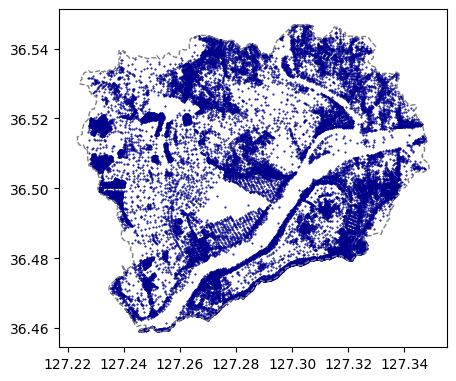

In [98]:
import matplotlib.pyplot as plt

# 예를 들어 sejong_boundary가 GeoDataFrame이라면:
fig, ax = plt.subplots(figsize=(5, 5))

# 공시지가 중심지점 플롯, 사이즈 줄이기
land_price.plot(ax=ax, color='Darkblue', markersize=0.25)

# 대상지 경계
sejong_boundary.plot(ax=ax, facecolor='None', edgecolor='gray', linestyle='--')  

# 플롯 보여주기
plt.show()


In [100]:
# 공시지가 데이터 저장
land_price = land_price.rename(columns=lambda x: str(x))
land_price.to_file('01outputdata/land_price.geojson', driver='GeoJSON')